In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from adaptive_sampling.processing_tools import mbar, thermodynamic_integration, gamd
from adaptive_sampling.units import *

### WTM-eABF

In [11]:
wtmeabf_traj = np.loadtxt('wtmeabf/CV_traj.dat', skiprows=1)

In [12]:
ext_sigma = 2.0    # thermal width of coupling between CV and extended variable 

# grid for free energy profile can be different than during sampling
minimum   = -45.0     
maximum   = 45.0    
bin_width = 1.0    
grid = np.arange(minimum, maximum, bin_width)

cv = wtmeabf_traj[:4000000,1]  # trajectory of collective variable
la = wtmeabf_traj[:4000000,2]  # trajectory of extended system

In [ ]:
plt.plot(cv)
plt.plot(la)

In [ ]:
# run MBAR and compute free energy profile and probability density from statistical weights
traj_list, indices, meta_f = mbar.get_windows(grid, cv, la, ext_sigma, equil_temp=300.0)
weights = mbar.run_mbar(traj_list, meta_f, conv=1.0e-4, conv_errvec=None, outfreq=100, equil_temp=300.0)

In [ ]:
pmf, rho = mbar.pmf_from_weights(grid, cv[indices], weights, equil_temp=300.0)
pmf -= pmf.min()

In [ ]:
# czar free energy estimate
czar_force = thermodynamic_integration.czar(grid, cv, la, ext_sigma, equil_temp=300.0)
pmf_ti, rho_ti = thermodynamic_integration.integrate(czar_force, bin_width, equil_temp=300.0)
pmf_ti -= pmf_ti.min()

In [ ]:
fig, axs = plt.subplots(1, figsize=(8,6))

axs.plot(grid, pmf, linewidth=4, label=r'eABF/MBAR')
axs.plot(grid+bin_width, pmf_ti, linewidth=4, label='eABF/CZAR')

axs.tick_params(axis='y',length=8,width=4,labelsize=30, pad=10, direction='in')
axs.tick_params(axis='x',length=8,width=4,labelsize=30, pad=10, direction='in')
#axs.grid()
axs.legend(fontsize=25, loc='best', frameon=False, shadow=False)
axs.set_xlabel(r'$x$', fontsize=40)
axs.set_ylabel(r'$A(x)$ / kJ mol$^{-1}$', fontsize=40)
axs.spines['bottom'].set_linewidth('3')
axs.spines['top'].set_linewidth('3')
axs.spines['left'].set_linewidth('3')
axs.spines['right'].set_linewidth('3')

fig.tight_layout()

### GaWTM-eABF

In [13]:
gawtmeabf_traj = np.loadtxt('gawtmeabf/CV_traj.dat', skiprows=1)

In [14]:
cv = gawtmeabf_traj[:,1]  # trajectory of collective variable
la = gawtmeabf_traj[:,2]  # trajectory of extended system
deltaU = gawtmeabf_traj[:,3]   # GaMD boost potential

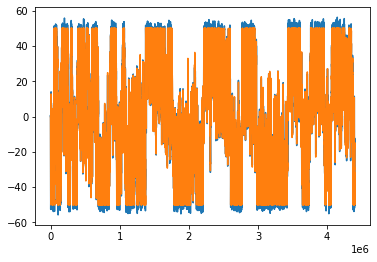

In [15]:
plt.plot(cv)
plt.plot(la)

In [16]:
# run MBAR and compute free energy profile and probability density from statistical weights
traj_list, indices, meta_f = mbar.get_windows(grid, cv, la, ext_sigma, equil_temp=300.0)
pot_list, _, _ = mbar.get_windows(grid, deltaU, la, ext_sigma, equil_temp=300.0)
weights = mbar.run_mbar(traj_list, meta_f, conv=1.0e-4, conv_errvec=None, outfreq=100, equil_temp=300.0, dU_list=pot_list)

Making Boltzmann factors

All ready!

Start of the self-consistent iteration.
Iter    1:	Conv=  0.0367285320	Conv_errvec=    513.943248
Iter  100:	Conv=  0.0011664181	Conv_errvec=     30.442355
Iter  200:	Conv=  0.0007158388	Conv_errvec=     16.592697
Iter  300:	Conv=  0.0004416551	Conv_errvec=      9.952015
Iter  400:	Conv=  0.0002725440	Conv_errvec=      6.129032
Iter  500:	Conv=  0.0001681903	Conv_errvec=      3.789181
Iter  600:	Conv=  0.0001037929	Conv_errvec=      2.339308
Converged after 608 iterations!
Max error vector: 2.250724530684238


In [17]:
pmf2, rho2 = mbar.pmf_from_weights(grid, cv[indices], weights, equil_temp=300.0)
pmf2 -= pmf2.min()

In [18]:
# czar free energy estimate
czar_force = thermodynamic_integration.czar(grid, cv, la, ext_sigma, equil_temp=300.0)
pmf_ti2, rho_ti2 = thermodynamic_integration.integrate(czar_force, bin_width, equil_temp=300.0)

In [19]:
# correction from GaMD
correction = gamd.gamd_correction_n(grid, cv, deltaU * atomic_to_kJmol, korder=2, equil_temp=2)
pmf_ti2 += correction
pmf_ti2 -= pmf_ti2.min()

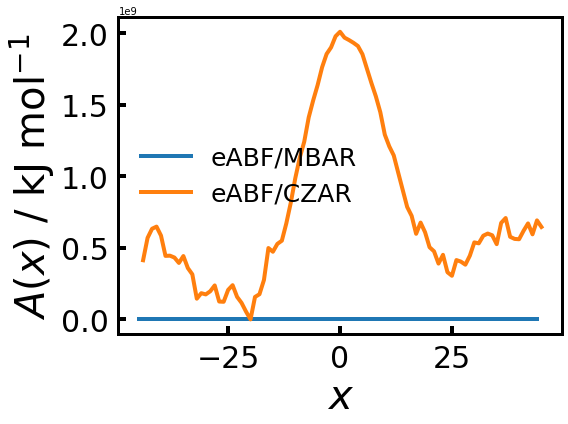

In [20]:
fig, axs = plt.subplots(1, figsize=(8,6))

axs.plot(grid, pmf2, linewidth=4, label=r'eABF/MBAR')
axs.plot(grid+bin_width, pmf_ti2, linewidth=4, label='eABF/CZAR')

axs.tick_params(axis='y',length=8,width=4,labelsize=30, pad=10, direction='in')
axs.tick_params(axis='x',length=8,width=4,labelsize=30, pad=10, direction='in')
#axs.grid()
axs.legend(fontsize=25, loc='best', frameon=False, shadow=False)
axs.set_xlabel(r'$x$', fontsize=40)
axs.set_ylabel(r'$A(x)$ / kJ mol$^{-1}$', fontsize=40)
axs.spines['bottom'].set_linewidth('3')
axs.spines['top'].set_linewidth('3')
axs.spines['left'].set_linewidth('3')
axs.spines['right'].set_linewidth('3')

fig.tight_layout()